# EDA_탐색적 데이터 분석
* 데이터 전처리, 데이터의 특성, 분포, 변환
* 수치형 데이터, 범주형 데이터를 따로 분석

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [24]:
data = pd.read_csv("./data/Titanic_train.csv")
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [25]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


In [26]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# 1. 결측값 처리

In [27]:
data.isna().sum() / len(data) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<Axes: >

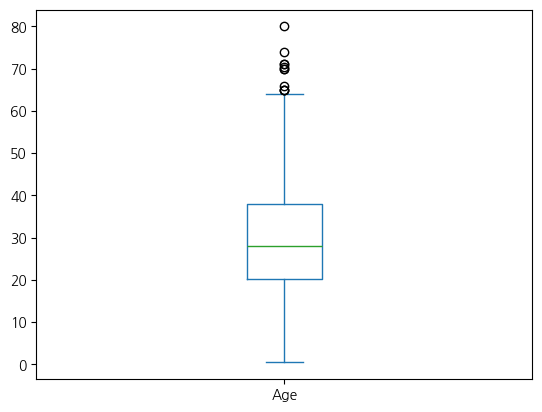

In [28]:
data['Age'].plot(kind='box')

In [29]:
# Boxplot으로 보아 이상치가 보이나 상식적으로 정상수명이므로 평균으로 대치
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [30]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


In [31]:
data['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F33            3
E101           3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [32]:
# Cabin은 결측 비율이 77%이므로 삭제
data = data.drop('Cabin', axis=1)

In [33]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(4)
memory usage: 76.7 KB


In [34]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [35]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    str    
dtypes: float64(2), int64(5), str(4)
memory usage: 76.7 KB


In [36]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [37]:
data = data.drop('PassengerId', axis=1)
data.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


# 숫자 컬럼과 문자 컬럼 분리
* .select_dtypes(include="str")
* .select_dtypes(exclude="str")

In [38]:
data.select_dtypes(include='str')

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S
...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,S
887,"Graham, Miss. Margaret Edith",female,112053,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,S
889,"Behr, Mr. Karl Howell",male,111369,C


In [39]:
data.select_dtypes(exclude='str')

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.000000,1,0,7.2500
1,1,1,38.000000,1,0,71.2833
2,1,3,26.000000,0,0,7.9250
3,1,1,35.000000,1,0,53.1000
4,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000
887,1,1,19.000000,0,0,30.0000
888,0,3,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


In [40]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='str')

In [41]:
category_col = data[['Survived', 'Pclass', 'Name', 'Sex', 
                 'SibSp', 'Parch', 'Ticket', 'Embarked']]
num_col = data[['Age', 'Fare']]

In [42]:
category_col.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C
2,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,S
4,0,3,"Allen, Mr. William Henry",male,0,0,373450,S


In [43]:
num_col.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


# category 컬럼에서 봐야할 것
* 범주형 자료
* unique 값이 각각 몇 개씩 있는가?  value_counts, unique, nuniqe
* 최빈값 mode 가 무엇인가?
* 막대 그래프로 도수 확인

============================== Survived ==============================
Survived
0    549
1    342
Name: count, dtype: int64


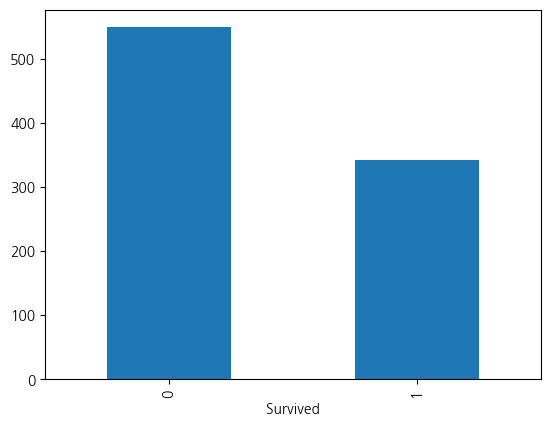

============================== Pclass ==============================
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


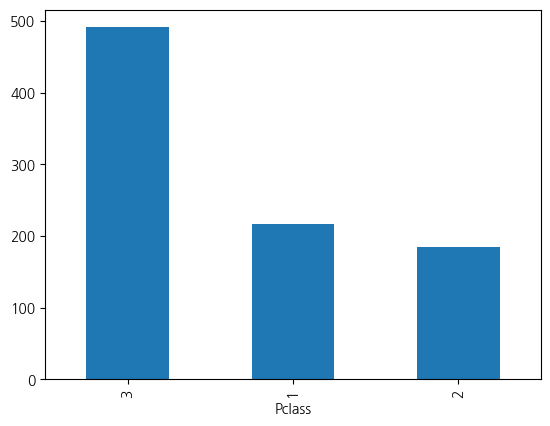

============================== Name ==============================
Name
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
Allen, Mr. William Henry                               1
                                                      ..
Montvila, Rev. Juozas                                  1
Graham, Miss. Margaret Edith                           1
Johnston, Miss. Catherine Helen "Carrie"               1
Behr, Mr. Karl Howell                                  1
Dooley, Mr. Patrick                                    1
Name: count, Length: 891, dtype: int64


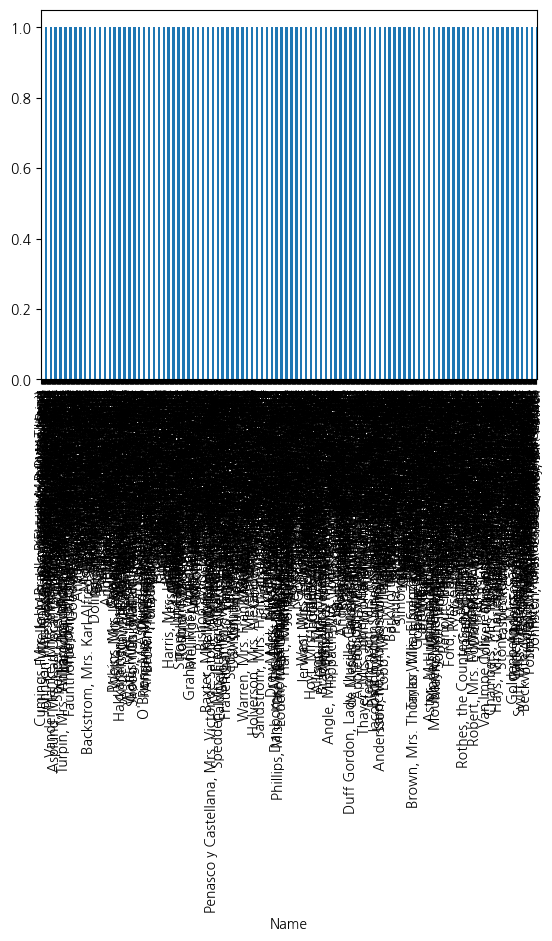

============================== Sex ==============================
Sex
male      577
female    314
Name: count, dtype: int64


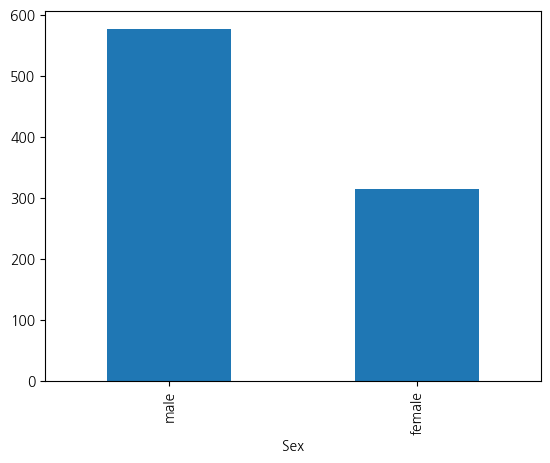

============================== SibSp ==============================
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


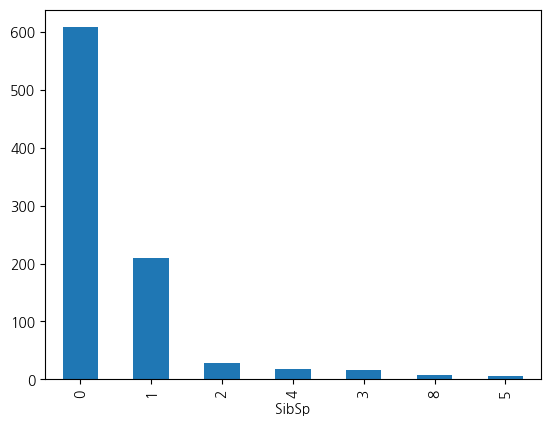

============================== Parch ==============================
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


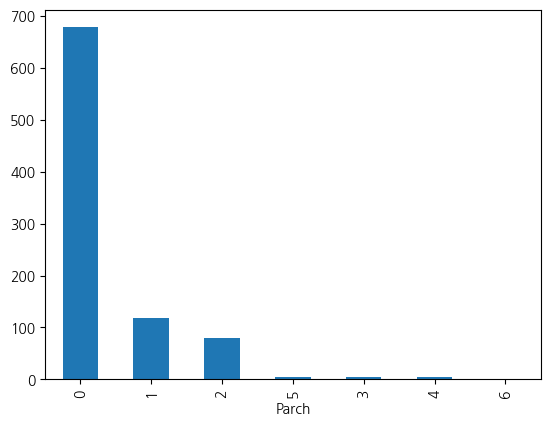

============================== Ticket ==============================
Ticket
347082             7
1601               7
CA. 2343           7
3101295            6
CA 2144            6
                  ..
SOTON/OQ 392076    1
211536             1
112053             1
111369             1
370376             1
Name: count, Length: 681, dtype: int64


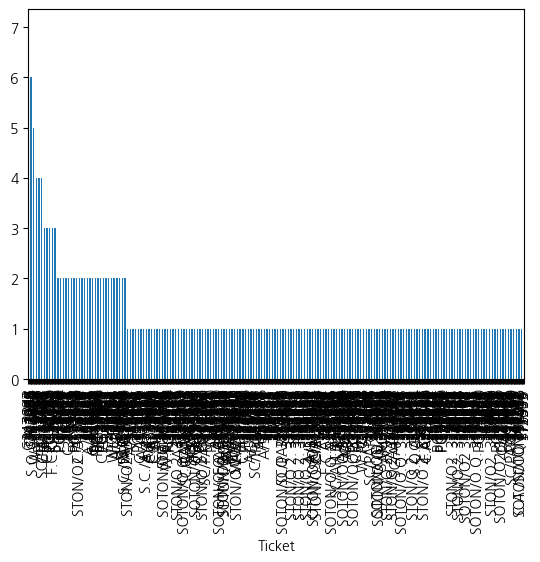

============================== Embarked ==============================
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


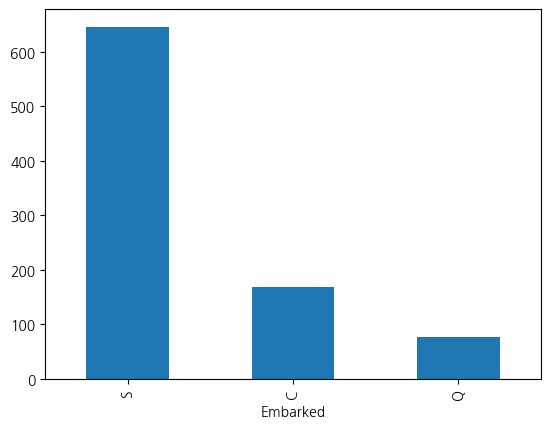

In [44]:
for col in category_col.columns:
    print("=" * 30, col, "=" * 30)
    print(category_col[col].value_counts())
    category_col[col].value_counts().plot(kind='bar')
    plt.show()

# 수치형 자료
* describe() : 평균, 표준편차, 4분위수
* 이상치 여부를 확인하기 위한 boxplot
* 분포를 보기 위해서 histogram, line
* 상관관계를 보기위한 corr()
* 상관관계 시각화를 위한 heatmap

============================== Age ==============================
count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64
0.4344880940129925


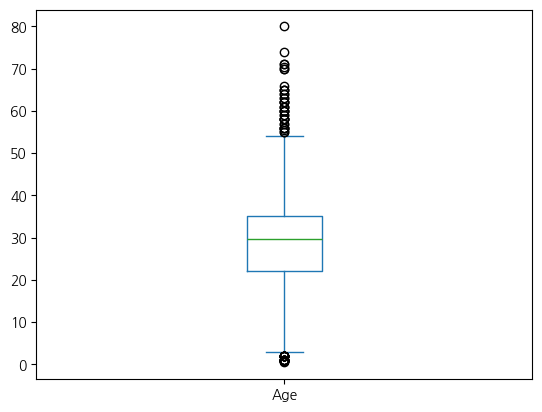

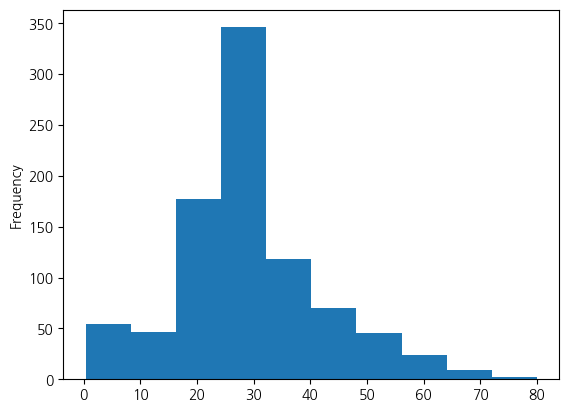

============================== Fare ==============================
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
4.787316519674893


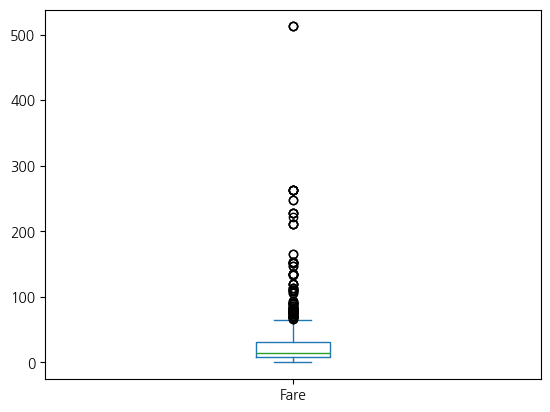

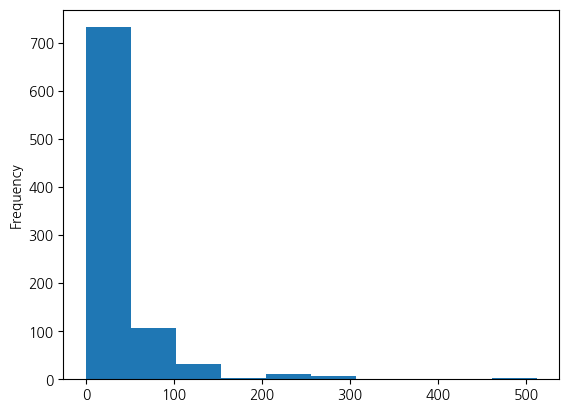

In [46]:
for col in num_col.columns:
    print("=" * 30, col, "=" * 30)
    print(num_col[col].describe())
    print(num_col[col].skew()) # 왜도 측정 함수 +: 왼쪽으로 치우침, - 오른쪽 치우침
    num_col[col].plot(kind='box')
    plt.show()
    num_col[col].plot(kind='hist')
    plt.show()

# fare 컬럼 분석

In [24]:
fare_desc = data['Fare'].describe()
fare_desc

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [25]:
# fare의 이상값 범위 찾기
upper_bound = fare_desc['75%'] + (1.5 * (fare_desc['75%'] - fare_desc['25%']))
upper_bound

np.float64(65.6344)

In [26]:
data[data['Fare'] > upper_bound]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
27,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S
31,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,C
34,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,C
52,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,C
...,...,...,...,...,...,...,...,...,...,...
846,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,CA. 2343,69.5500,S
849,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,29.699118,1,0,17453,89.1042,C
856,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.000000,1,1,36928,164.8667,S
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,S


* fare를 pclass 별로 나누어 확인

In [27]:
pc_fare_desc = data[['Pclass', 'Fare']].groupby('Pclass').describe()
pc_fare_desc

Fare                                                              
        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500

In [28]:
pc_fare_desc.index

Index([1, 2, 3], dtype='int64', name='Pclass')

In [29]:
pc_fare_desc.columns

MultiIndex([('Fare', 'count'),
            ('Fare',  'mean'),
            ('Fare',   'std'),
            ('Fare',   'min'),
            ('Fare',   '25%'),
            ('Fare',   '50%'),
            ('Fare',   '75%'),
            ('Fare',   'max')],
           )

In [30]:
pc_fare_desc[('Fare',   '75%')]

Pclass
1    93.5
2    26.0
3    15.5
Name: (Fare, 75%), dtype: float64

In [31]:
pc_fare_desc['upper_bound'] = pc_fare_desc[('Fare','75%')] + (1.5 * pc_fare_desc[('Fare','75%')] - pc_fare_desc[('Fare','25%')])
pc_fare_desc

Fare                                                                \
        count       mean        std  min       25%      50%   75%       max   
Pclass                                                                        
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292   
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000   
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500   

       upper_bound  
                    
Pclass              
1        202.82605  
2         52.00000  
3         31.00000

In [32]:
pc_fare_desc.columns

MultiIndex([(       'Fare', 'count'),
            (       'Fare',  'mean'),
            (       'Fare',   'std'),
            (       'Fare',   'min'),
            (       'Fare',   '25%'),
            (       'Fare',   '50%'),
            (       'Fare',   '75%'),
            (       'Fare',   'max'),
            ('upper_bound',      '')],
           )

In [33]:
pc_fare_desc.iloc[0, -1]

np.float64(202.82605)

In [34]:
data[(data['Pclass'] == 1) & (data['Fare'] > pc_fare_desc.iloc[0, -1])]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
27,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S
88,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.0000,S
118,0,1,"Baxter, Mr. Quigg Edmond",male,24.000000,0,1,PC 17558,247.5208,C
258,1,1,"Ward, Miss. Anna",female,35.000000,0,0,PC 17755,512.3292,C
299,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.000000,0,1,PC 17558,247.5208,C
311,1,1,"Ryerson, Miss. Emily Borie",female,18.000000,2,2,PC 17608,262.3750,C
341,1,1,"Fortune, Miss. Alice Elizabeth",female,24.000000,3,2,19950,263.0000,S
377,0,1,"Widener, Mr. Harry Elkins",male,27.000000,0,2,113503,211.5000,C
380,1,1,"Bidois, Miss. Rosalie",female,42.000000,0,0,PC 17757,227.5250,C
438,0,1,"Fortune, Mr. Mark",male,64.000000,1,4,19950,263.0000,S


In [35]:
data[(data['Pclass'] == 2) & (data['Fare'] > pc_fare_desc.iloc[1, -1])]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
72,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5,S
120,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5,S
385,0,2,"Davies, Mr. Charles Henry",male,18.0,0,0,S.O.C. 14879,73.5,S
615,1,2,"Herman, Miss. Alice",female,24.0,1,2,220845,65.0,S
655,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5,S
665,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5,S
754,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.0,1,2,220845,65.0,S


In [36]:
73.5 / 5

14.7

In [37]:
data.loc[(data['Pclass'] == 2), 'Fare'].median()

np.float64(14.25)

# 독립변수간의 상관관계 구하기
* .corr()
* 수치형 데이터만 있을 때의 상관관계 피어슨 상관관계
* 수치형과 범주형이 섞여 있을 때의 상관관계 스피어만 상관관계
* 독립 변수간 상관관계가 높을 경우 (+, - 상관없이) 하나만 사용

In [49]:
data_corr = data.select_dtypes(exclude='str').corr(method="spearman")
data_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.339668,-0.039109,0.088879,0.138266,0.323736
Pclass,-0.339668,1.000000,-0.308875,-0.043019,-0.022801,-0.688032
Age,-0.039109,-0.308875,1.000000,-0.147035,-0.217290,0.118847
SibSp,0.088879,-0.043019,-0.147035,1.000000,0.450014,0.447113
Parch,0.138266,-0.022801,-0.217290,0.450014,1.000000,0.410074
Fare,0.323736,-0.688032,0.118847,0.447113,0.410074,1.000000


In [50]:
import seaborn as sns

<Axes: >

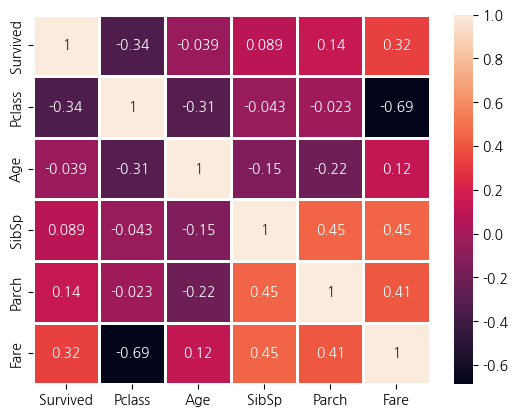

In [51]:
sns.heatmap(data_corr, annot=True, linewidth=1)

* Pclass 와 Fare 의 상관관계 높음 0.69  어느 것을 사용?

# 종속변수와 독립변수와의 groupby를 통한 상관관계 탐색

In [41]:
data[['Survived', 'Pclass']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [42]:
data[['Survived', 'Fare']].groupby('Fare').mean()

,Survived
Fare,
0.0000,0.066667
4.0125,0.000000
5.0000,0.000000
6.2375,0.000000
6.4375,0.000000
...,...
227.5250,0.750000
247.5208,0.500000
262.3750,1.000000


In [43]:
data.columns[1:]

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='str')

In [44]:
for col in data.columns[1:]:
    print("="* 30, col, "="* 30)
    display(data[['Survived', col]].groupby(col).mean())
    print()

============================== Pclass ==============================


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363



============================== Name ==============================


,Survived
Name,
"Abbing, Mr. Anthony",0.0
"Abbott, Mr. Rossmore Edward",0.0
"Abbott, Mrs. Stanton (Rosa Hunt)",1.0
"Abelson, Mr. Samuel",0.0
"Abelson, Mrs. Samuel (Hannah Wizosky)",1.0
...,...
"de Mulder, Mr. Theodore",1.0
"de Pelsmaeker, Mr. Alfons",0.0
"del Carlo, Mr. Sebastiano",0.0



============================== Sex ==============================


,Survived
Sex,
female,0.742038
male,0.188908



============================== Age ==============================


,Survived
Age,
0.42,1.0
0.67,1.0
0.75,1.0
0.83,1.0
0.92,1.0
...,...
70.00,0.0
70.50,0.0
71.00,0.0



============================== SibSp ==============================


,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000



============================== Parch ==============================


,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000



============================== Ticket ==============================


,Survived
Ticket,
110152,1.000000
110413,0.666667
110465,0.000000
110564,1.000000
110813,1.000000
...,...
W./C. 6608,0.000000
W./C. 6609,0.000000
W.E.P. 5734,0.000000



============================== Fare ==============================


,Survived
Fare,
0.0000,0.066667
4.0125,0.000000
5.0000,0.000000
6.2375,0.000000
6.4375,0.000000
...,...
227.5250,0.750000
247.5208,0.500000
262.3750,1.000000



============================== Embarked ==============================


,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


* 성별별 pclass별 생존율

In [45]:
data[['Sex', 'Pclass', 'Survived']].groupby(['Sex', 'Pclass']).mean()

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

* Age를 10살 단위로 구간화해서 생존율 구하기

In [46]:
data['Age'].max()

np.float64(80.0)

In [47]:
def age_bins(age):
    if age < 10:
        return "under10"
    elif 10 <= age < 20:
        return "10s"
    elif 20 <= age < 30:
        return "20s"
    elif 30 <= age < 40:
        return "30s"
    elif 40 <= age < 50:
        return "40s"
    elif 50 <= age < 60:
        return "50s"
    elif 60 <= age < 70:
        return "60s"
    elif 70 <= age < 80:
        return "70s"
    elif 80 <= age < 90:
        return "80s"

In [48]:
data['age_bins'] = data['Age'].apply(age_bins)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_bins
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,20s
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,30s
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,20s
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,30s
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,30s
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,20s
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,10s
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,20s
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,20s


In [49]:
data[['age_bins', 'Survived']].groupby('age_bins').mean()

,Survived
age_bins,
10s,0.401961
20s,0.324937
30s,0.437126
40s,0.382022
50s,0.416667
60s,0.315789
70s,0.000000
80s,1.000000
under10,0.612903


In [50]:
data[['age_bins', 'Sex', 'Survived']].groupby(['age_bins', 'Sex']).mean()

Survived
age_bins Sex             
10s      female  0.755556
         male    0.122807
20s      female  0.704000
         male    0.150735
30s      female  0.833333
         male    0.214953
40s      female  0.687500
         male    0.210526
50s      female  0.888889
         male    0.133333
60s      female  1.000000
         male    0.133333
70s      male    0.000000
80s      male    1.000000
under10  female  0.633333
         male    0.593750

In [51]:
data[['age_bins', 'Sex', 'Pclass', 'Survived']].groupby(['age_bins', 'Sex', 'Pclass']).mean()

Survived
age_bins Sex    Pclass          
10s      female 1       1.000000
                2       1.000000
                3       0.541667
         male   1       0.400000
                2       0.100000
                3       0.095238
20s      female 1       0.960000
                2       0.888889
                3       0.547945
         male   1       0.358974
                2       0.054054
                3       0.127551
30s      female 1       1.000000
                2       0.941176
                3       0.437500
         male   1       0.521739
                2       0.096774
                3       0.150943
40s      female 1       1.000000
                2       0.900000
                3       0.000000
         male   1       0.375000
                2       0.125000
                3       0.080000
50s      female 1       0.916667
                2       0.833333
         male   1       0.266667
                2       0.000000
                3       0.000000
60s      female 1       1.000000
                3       1.000000
         male   1       0.100000
                2       0.333333
                3       0.000000
70s      male   1       0.000000
                2       0.000000
                3       0.000000
80s      male   1       1.000000
under10  female 1       0.000000
                2       1.000000
                3       0.523810
         male   1       1.000000
                2       1.000000
                3       0.380952

In [52]:
data['Age'].nunique()

89

In [53]:
data['age_bins'].nunique()

9

* 데이터의 구간화를 쉽게 해주는 함수 cut
* pd.cut(data['Age'], bins=[구간], labels['구간의 이름], right=False)

In [54]:
data['age_bins2'] = pd.cut(data['Age'], 
      bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
      labels=['under10', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s'],
     right=False)

In [55]:
data[(data['age_bins'] == data['age_bins2']) == True]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_bins,age_bins2
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,20s,20s
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,30s,30s
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,20s,20s
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,30s,30s
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,30s,30s
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,20s,20s
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,10s,10s
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,20s,20s
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,20s,20s


# 분석에 사용할 변수 선택하기

* parch, sibsp 는 family로 묶음

In [56]:
data['family'] = data['SibSp'] + data['Parch'] 

In [57]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_bins,age_bins2,family
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,20s,20s,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,30s,30s,1
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,20s,20s,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,30s,30s,1
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,30s,30s,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,20s,20s,0
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,10s,10s,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,20s,20s,3
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,20s,20s,0


In [58]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'age_bins', 'age_bins2', 'family'],
      dtype='str')

In [59]:
data_set1 = data[['Survived', 'Pclass', 'Sex', 'Age', 'Embarked', 'family']]
data_set1

,Survived,Pclass,Sex,Age,Embarked,family
0,0,3,male,22.000000,S,1
1,1,1,female,38.000000,C,1
2,1,3,female,26.000000,S,0
3,1,1,female,35.000000,S,1
4,0,3,male,35.000000,S,0
...,...,...,...,...,...,...
886,0,2,male,27.000000,S,0
887,1,1,female,19.000000,S,0
888,0,3,female,29.699118,S,3
889,1,1,male,26.000000,C,0


In [60]:
data_set2 = data[['Survived', 'Pclass', 'Sex', 'age_bins', 'Embarked', 'family']]
data_set2

,Survived,Pclass,Sex,age_bins,Embarked,family
0,0,3,male,20s,S,1
1,1,1,female,30s,C,1
2,1,3,female,20s,S,0
3,1,1,female,30s,S,1
4,0,3,male,30s,S,0
...,...,...,...,...,...,...
886,0,2,male,20s,S,0
887,1,1,female,10s,S,0
888,0,3,female,20s,S,3
889,1,1,male,20s,C,0


# 종속변수와 독립변수 분리

In [61]:
X = data_set1.drop('Survived', axis=1)
y = data_set1['Survived']

In [62]:
X

,Pclass,Sex,Age,Embarked,family
0,3,male,22.000000,S,1
1,1,female,38.000000,C,1
2,3,female,26.000000,S,0
3,1,female,35.000000,S,1
4,3,male,35.000000,S,0
...,...,...,...,...,...
886,2,male,27.000000,S,0
887,1,female,19.000000,S,0
888,3,female,29.699118,S,3
889,1,male,26.000000,C,0


In [63]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [64]:
X2 = data_set2.drop('Survived', axis=1)
y2 = data_set2['Survived']

In [65]:
X2

,Pclass,Sex,age_bins,Embarked,family
0,3,male,20s,S,1
1,1,female,30s,C,1
2,3,female,20s,S,0
3,1,female,30s,S,1
4,3,male,30s,S,0
...,...,...,...,...,...
886,2,male,20s,S,0
887,1,female,10s,S,0
888,3,female,20s,S,3
889,1,male,20s,C,0


In [66]:
y2

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# 훈련데이터와 검증/테스트 데이터 분리하기(홀드아웃)
* random_state: 데이터를 섞는 난수표 
* statify: y에 class가 불균형할 경우 비율 보존

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [69]:
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

623 268
623 268


In [70]:
y_train.value_counts()

Survived
0    384
1    239
Name: count, dtype: int64

# 알고리즘 불러와서 훈련 및 검증

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [72]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train) # 공부하기 (X_train= 모의고사 문제지, y_train=모의고사 답안지)
pred = dtc.predict(X_test) # X_test 시험보기 pred = 답안지
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

ValueError: could not convert string to float: 'male'

In [73]:
X_train

,Pclass,Sex,Age,Embarked,family
748,1,male,19.000000,S,1
45,3,male,29.699118,S,0
28,3,female,29.699118,Q,0
633,1,male,29.699118,S,0
403,3,male,28.000000,S,1
...,...,...,...,...,...
476,2,male,34.000000,S,1
190,2,female,32.000000,S,0
736,3,female,48.000000,S,4
462,1,male,47.000000,S,0


In [74]:
y_train

748    0
45     0
28     1
633    0
403    0
      ..
476    0
190    1
736    0
462    0
136    1
Name: Survived, Length: 623, dtype: int64

# 문자로 되어 있는 변수를 숫자로 변환
## X_train에서 fit
## X_test는 transform만
* lable encoder: 문자를 숫자로 변환 - 서열이 생김
* dummy 변수화: 범주별 변수(컬럼) 생성 - 새로운 데이터에 훈련시 없던 범주가 들어오면 에러 발생
* one-hot encoding: 범주별 변수(컬럼) 생성 - 새로운 데이터에 훈련시 없던 범주가 들어와도 자동 처리

In [75]:
# 조건식과 apply로 바꾸기
data_set1['Sex'].apply(lambda x: 1 if x == 'male' else 0)

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
le = LabelEncoder()
label_encoded = le.fit_transform(data_set1['Sex'])

In [78]:
le.inverse_transform(label_encoded)

array(['male', 'female', 'female', 'female', 'male', 'male', 'male',
       'male', 'female', 'female', 'female', 'female', 'male', 'male',
       'female', 'female', 'male', 'male', 'female', 'female', 'male',
       'male', 'female', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'male', 'male', 'male', 'female', 'female', 'female', 'female',
       'male', 'female', 'female', 'male', 'male', 'female', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'female', 'male', 'male', 'female', 'male',
       'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'female', 'male', 'male', 'female', 'male', 'female', 'female',
       'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male',
      

dummy변수로 만들기 get_dummies()

In [79]:
pd.get_dummies(data_set1, drop_first=True)

,Survived,Pclass,Age,family,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,1,True,False,True
1,1,1,38.000000,1,False,False,False
2,1,3,26.000000,0,False,False,True
3,1,1,35.000000,1,False,False,True
4,0,3,35.000000,0,True,False,True
...,...,...,...,...,...,...,...
886,0,2,27.000000,0,True,False,True
887,1,1,19.000000,0,False,False,True
888,0,3,29.699118,3,False,False,True
889,1,1,26.000000,0,True,False,False


# one-hot encoding

In [80]:
from sklearn.preprocessing import OneHotEncoder

In [81]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'Embarked', 'family'], dtype='str')

In [87]:
# 1️⃣ One-Hot Encoding
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

ohe.fit(X_train[['Sex', 'Embarked']])  # 반드시 train만 fit

X_train_ohe = ohe.transform(X_train[['Sex', 'Embarked']])
X_test_ohe = ohe.transform(X_test[['Sex', 'Embarked']])

# DataFrame으로 변환
X_train_ohe = pd.DataFrame(
    X_train_ohe,
    index=X_train.index,
    columns=ohe.get_feature_names_out(['Sex', 'Embarked'])
)

X_test_ohe = pd.DataFrame(
    X_test_ohe,
    index=X_test.index,
    columns=ohe.get_feature_names_out(['Sex', 'Embarked'])
)

# 2️⃣ 기존 컬럼 삭제
X_train_drop = X_train.drop(columns=['Sex', 'Embarked'])
X_test_drop = X_test.drop(columns=['Sex', 'Embarked'])

# 3️⃣ 다시 합치기
X_train_final = pd.concat([X_train_drop, X_train_ohe], axis=1)
X_test_final = pd.concat([X_test_drop, X_test_ohe], axis=1)

# 확인
display(X_train_final.head())
display(X_test_final.head())


,Pclass,Age,family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
748,1,19.000000,1,0.0,1.0,0.0,0.0,1.0
45,3,29.699118,0,0.0,1.0,0.0,0.0,1.0
28,3,29.699118,0,1.0,0.0,0.0,1.0,0.0
633,1,29.699118,0,0.0,1.0,0.0,0.0,1.0
403,3,28.000000,1,0.0,1.0,0.0,0.0,1.0


,Pclass,Age,family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
625,1,61.000000,0,0.0,1.0,0.0,0.0,1.0
566,3,19.000000,0,0.0,1.0,0.0,0.0,1.0
459,3,29.699118,0,0.0,1.0,0.0,1.0,0.0
804,3,27.000000,0,0.0,1.0,0.0,0.0,1.0
338,3,45.000000,0,0.0,1.0,0.0,0.0,1.0


In [195]:
df = pd.get_dummies(data_set1, drop_first=True)

In [196]:
X3 = df.drop('Survived', axis=1)
y3 = df['Survived']

In [197]:
X3

,Pclass,Age,family,Sex_male,Embarked_Q,Embarked_S
0,3,22.000000,1,True,False,True
1,1,38.000000,1,False,False,False
2,3,26.000000,0,False,False,True
3,1,35.000000,1,False,False,True
4,3,35.000000,0,True,False,True
...,...,...,...,...,...,...
886,2,27.000000,0,True,False,True
887,1,19.000000,0,False,False,True
888,3,29.699118,3,False,False,True
889,1,26.000000,0,True,False,False


In [198]:
y3

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.3, random_state=42, stratify=y3)

In [202]:
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8059701492537313
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       165
           1       0.78      0.69      0.73       103

    accuracy                           0.81       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.81      0.80       268



In [201]:
for i in range(1, 31):
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print("=" * 30, f"max_depth  {i}", "=" * 30)
    print(accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))
    print()

============================== max_depth  1 ==============================
0.7761194029850746
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       165
           1       0.72      0.68      0.70       103

    accuracy                           0.78       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.78      0.77       268


============================== max_depth  2 ==============================
0.7686567164179104
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       165
           1       0.70      0.70      0.70       103

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268


============================== max_depth  3 ==============================
0.8059701492537313
              precision    recall  f1-score   support

       

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       165
           1       0.71      0.64      0.67       103

    accuracy                           0.76       268
   macro avg       0.75      0.74      0.74       268
weighted avg       0.76      0.76      0.76       268


============================== max_depth  26 ==============================
0.7574626865671642
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       165
           1       0.71      0.63      0.67       103

    accuracy                           0.76       268
   macro avg       0.75      0.73      0.74       268
weighted avg       0.75      0.76      0.75       268


============================== max_depth  27 ==============================
0.753731343283582
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       165
           1       0.70      0.63      0.66   

In [91]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['Sex', 'Embarked'])
    ],
    remainder='passthrough'
)

X_train_final = ct.fit_transform(X_train)
X_test_final = ct.transform(X_test)


In [93]:
ct.set_output(transform='pandas')

X_train_final = ct.fit_transform(X_train)
X_test_final = ct.transform(X_test)

display(X_train_final.head())


,ohe__Sex_female,ohe__Sex_male,ohe__Embarked_C,ohe__Embarked_Q,ohe__Embarked_S,remainder__Pclass,remainder__Age,remainder__family
748,0.0,1.0,0.0,0.0,1.0,1,19.000000,1
45,0.0,1.0,0.0,0.0,1.0,3,29.699118,0
28,1.0,0.0,0.0,1.0,0.0,3,29.699118,0
633,0.0,1.0,0.0,0.0,1.0,1,29.699118,0
403,0.0,1.0,0.0,0.0,1.0,3,28.000000,1
